In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os 
import pandas as pd
import cv2 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
import os
import cv2
import numpy as np

def load_and_preprocess_images_kaggle(train_directory, save_directory):
    image_list = []
    for dirname, _, filenames in os.walk(train_directory):
        for filename in filenames:
            # Check for relevant image files
            if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                image_path = os.path.join(dirname, filename)
                print(f"Loading image: {image_path}")
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Failed to load image: {image_path}")
                else:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (100, 100))
                    image_list.append(image)

                    # Save the preprocessed image
                    save_path = os.path.join(save_directory, filename)
                    cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    return np.array(image_list)

# Path to the images
kaggle_train_directory = './images/train'
save_directory = 'images'  # Directory for saving processed images

# Create a directory to save the preprocessed images
os.makedirs(save_directory, exist_ok=True)

# Loading and preprocessing images
images = load_and_preprocess_images_kaggle(kaggle_train_directory, save_directory)


Loading image: ./images/train\100075.jpg
Loading image: ./images/train\100080.jpg
Loading image: ./images/train\100098.jpg
Loading image: ./images/train\103041.jpg
Loading image: ./images/train\104022.jpg
Loading image: ./images/train\105019.jpg
Loading image: ./images/train\105053.jpg
Loading image: ./images/train\106020.jpg
Loading image: ./images/train\106025.jpg
Loading image: ./images/train\108041.jpg
Loading image: ./images/train\108073.jpg
Loading image: ./images/train\109034.jpg
Loading image: ./images/train\112082.jpg
Loading image: ./images/train\113009.jpg
Loading image: ./images/train\113016.jpg
Loading image: ./images/train\113044.jpg
Loading image: ./images/train\117054.jpg
Loading image: ./images/train\118020.jpg
Loading image: ./images/train\118035.jpg
Loading image: ./images/train\12003.jpg
Loading image: ./images/train\12074.jpg
Loading image: ./images/train\122048.jpg
Loading image: ./images/train\124084.jpg
Loading image: ./images/train\126039.jpg
Loading image: ./i

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Number of experiment repetitions
n_repetitions = 30

# Fixed seed for experiment reproducibility
seed = 42

# Lists to store results
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
agglomerative_silhouette_scores = []

for repetition in range(n_repetitions):
    print(f"Repetition {repetition + 1}/{n_repetitions}")

    # Set seed for this repetition
    np.random.seed(seed)

    # Shuffle the images (ensure different starting points for each repetition)
    np.random.shuffle(images)

    for image in images:
        # Flatten the image for easier use with clustering algorithms
        flat_image = image.reshape((-1, 3))

        # K-Means algorithm
        kmeans = KMeans(n_clusters=8, n_init=10, random_state=seed)
        kmeans_labels = kmeans.fit_predict(flat_image)
        kmeans_silhouette = silhouette_score(flat_image, kmeans_labels)
        print(f"K-Means - Iteration {repetition + 1}: Silhouette Score = {kmeans_silhouette:.4f}")
        kmeans_silhouette_scores.append(kmeans_silhouette)
        
        # DBSCAN algorithm
        dbscan = DBSCAN(eps=10, min_samples=5)
        dbscan_labels = dbscan.fit_predict(flat_image)
        unique_labels = np.unique(dbscan_labels)
        if len(unique_labels) > 1:
            dbscan_silhouette = silhouette_score(flat_image, dbscan_labels)
            print(f"DBSCAN - Iteration {repetition + 1}: Silhouette Score = {dbscan_silhouette:.4f}")
            dbscan_silhouette_scores.append(dbscan_silhouette)

        # Agglomerative Clustering algorithm
        agglomerative = AgglomerativeClustering(n_clusters=8)
        agglomerative_labels = agglomerative.fit_predict(flat_image)

        # Evaluate Agglomerative Clustering using Silhouette Score
        agglomerative_silhouette = silhouette_score(flat_image, agglomerative_labels)
        print(f"Agglomerative Clustering - Iteration {repetition + 1}: Silhouette Score = {agglomerative_silhouette:.4f}")
        agglomerative_silhouette_scores.append(agglomerative_silhouette)

# Calculate mean and standard deviation of K-Means results
kmeans_avg_silhouette = np.mean(kmeans_silhouette_scores)
kmeans_std_silhouette = np.std(kmeans_silhouette_scores)

# Calculate mean and standard deviation of DBSCAN results
dbscan_avg_silhouette = np.mean(dbscan_silhouette_scores)
dbscan_std_silhouette = np.std(dbscan_silhouette_scores)

# Calculate mean and standard deviation of Agglomerative Clustering results
agglomerative_avg_silhouette = np.mean(agglomerative_silhouette_scores)
agglomerative_std_silhouette = np.std(agglomerative_silhouette_scores)

# Print the average Silhouette Scores with standard deviations
print(f"K-Means - Average Silhouette Score: {kmeans_avg_silhouette:.4f} ± {kmeans_std_silhouette:.4f}")
print(f"DBSCAN - Average Silhouette Score: {dbscan_avg_silhouette:.4f} ± {dbscan_std_silhouette:.4f}")
print(f"Agglomerative Clustering - Average Silhouette Score: {agglomerative_avg_silhouette:.4f} ± {agglomerative_std_silhouette:.4f}")


Repetition 1/30
K-Means - Iteration 1: Silhouette Score = 0.4368
DBSCAN - Iteration 1: Silhouette Score = 0.5162
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.4172
K-Means - Iteration 1: Silhouette Score = 0.3740
DBSCAN - Iteration 1: Silhouette Score = -0.2404
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.3306
K-Means - Iteration 1: Silhouette Score = 0.4904
DBSCAN - Iteration 1: Silhouette Score = -0.2916
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.5375
K-Means - Iteration 1: Silhouette Score = 0.4441
DBSCAN - Iteration 1: Silhouette Score = 0.4162
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.4229
K-Means - Iteration 1: Silhouette Score = 0.4628
DBSCAN - Iteration 1: Silhouette Score = 0.1381
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.4329
K-Means - Iteration 1: Silhouette Score = 0.4257
DBSCAN - Iteration 1: Silhouette Score = 0.0687
Agglomerative Clustering - Iteration 1: Silhouette Score = 0.3742
K-Me

In [ ]:
import re
import numpy as np

# Extract the values of Silhouette Scores
kmeans_scores = re.findall(r"K-Means - Iteration \d+: Silhouette Score = ([\d.-]+)", results)
dbscan_scores = re.findall(r"DBSCAN - Iteration \d+: Silhouette Score = ([\d.-]+)", results)

# Convert the values to float
kmeans_scores = [float(score) for score in kmeans_scores]
dbscan_scores = [float(score) for score in dbscan_scores]

# Calculate the mean and standard deviation
kmeans_avg_score = np.mean(kmeans_scores)
dbscan_avg_score = np.mean(dbscan_scores)
kmeans_std_score = np.std(kmeans_scores)
dbscan_std_score = np.std(dbscan_scores)

# Print the results
print(f"K-Means - Average Silhouette Score: {kmeans_avg_score:.4f} ± {kmeans_std_score:.4f}")
print(f"DBSCAN - Average Silhouette Score: {dbscan_avg_score:.4f} ± {dbscan_std_score:.4f}")


K-Means - Média do Silhouette Score: 0.4466 ± 0.0709
DBSCAN - Média do Silhouette Score: 0.1957 ± 0.3330


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load the image you want to segment
image = cv2.imread('./images/train/108041.jpg')

# Convert the image to RGB format (assuming the image is originally in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply K-Means clustering to group the pixels of the image
n_clusters = 5  # Desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)

# Reshape the pixel matrix into a 2D array
pixels = image.reshape(-1, 3)

# Fit K-Means on the pixels
kmeans.fit(pixels)

# Assign cluster labels to each pixel
cluster_labels = kmeans.predict(pixels)

# Create a new segmented image based on the cluster labels
segmented_image = kmeans.cluster_centers_[cluster_labels]
segmented_image = segmented_image.reshape(image.shape)

# Convert the segmented image back to BGR format (if necessary)
segmented_image_bgr = cv2.cvtColor(segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)

# Save the segmented image
cv2.imwrite('kmeans_segmented.jpg', segmented_image_bgr)


True

True

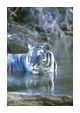

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/train/108041.jpg')

# Resize the image for faster processing
height, width, _ = img.shape
img = cv2.resize(img, (width // 2, height // 2))

# Convert the image to LAB color space
labimg = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Apply Gaussian pyramid downsampling (reducing resolution)
n = 0
while n < 4:
    labimg = cv2.pyrDown(labimg)
    n += 1

# Reshape the image into feature vectors
feature_image = np.reshape(labimg, [-1, 3])

# Get the dimensions of the image
rows, cols, chs = labimg.shape

# Initialize DBSCAN clustering with specified parameters
db = DBSCAN(eps=10, min_samples=5, metric='euclidean', algorithm='auto')

# Fit DBSCAN to the feature image
db.fit(feature_image)
labels = db.labels_

# Concatenate LAB colors and spatial coordinates for feature extraction
indices = np.dstack(np.indices(labimg.shape[:2]))
xycolors = np.concatenate((labimg, indices), axis=-1)
feature_image2 = np.reshape(xycolors, [-1, 5])

# Fit DBSCAN to the extended feature image
db.fit(feature_image2)
labels2 = db.labels_

# Plot the original image and the segmented image
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Segmented image (you may need to implement the visualization of segmented regions)
plt.subplot(2, 1, 2)
plt.imshow(labels.reshape(rows, cols), cmap='jet')
plt.title('DBSCAN Segmented Image')
plt.axis('off')

# Save the segmented image (this line doesn't actually save the segmented image)
# cv2.imwrite('imagem_segmentada_dbscan.jpg', img)

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os

# Load the image you want to segment
image = cv2.imread('./images/train/108041.jpg')

# Get the height and width of the image
height, width, _ = image.shape

# Resize the image to reduce resolution for easier clustering
reduced_image = cv2.resize(image, (100, 100))  # Resize to a lower resolution
image_rgb = cv2.cvtColor(reduced_image, cv2.COLOR_BGR2RGB)  # Ensure image is in RGB format

# Flatten the image into a 2D array of pixels (rows are pixels, columns are RGB values)
flat_image = image_rgb.reshape((-1, 3))

# Apply K-Means clustering to reduce the number of colors
n_colors = 5  # Desired number of colors
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(flat_image)
kmeans_labels = kmeans.predict(flat_image)
palette = kmeans.cluster_centers_.astype(np.uint8)  # Convert cluster centers to uint8 for reconstruction

# Reconstruct the image using the color palette
reconstructed_image = palette[kmeans_labels].reshape(reduced_image.shape)

# Resize the reconstructed image back to the original size
segmented_image = cv2.resize(reconstructed_image, (width, height))

# Specify the output directory and filename for saving the segmented image
output_directory = "./output"
output_filename = "segmented_image.jpg"
output_path = os.path.join(output_directory, output_filename)

# Save the segmented image
try:
    cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
    print("Image saved successfully.")
except Exception as e:
    print(f"Error saving the image: {str(e)}")


Image saved successfully.
